In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
loc = 'Dataset\\serena_williams\\tmp_iILGT7_2f290cf6f8496dc0_GettyImages-676049730.jpg'
img = cv2.imread(loc)
img.shape

(2870, 2048, 3)

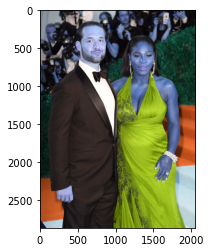

In [3]:
plt.imshow(img)

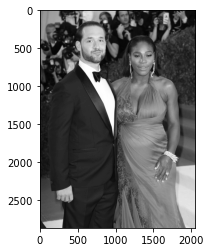

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[1035,   15,  154,  154],
       [1164,  454,  377,  377],
       [ 524,  242,  410,  410]], dtype=int32)

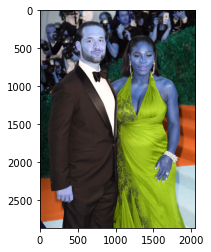

In [6]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(face_img)

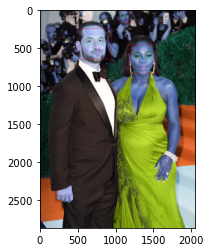

In [7]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

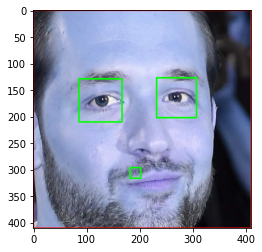

In [8]:
plt.imshow(roi_color,cmap='gray')

In [9]:
def get_cropped_image_if2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>= 2:
            return roi_color

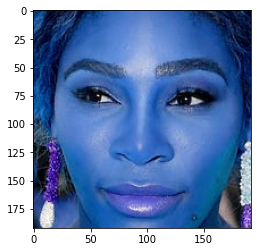

In [10]:
loc = 'Dataset\\serena_williams\\5e187cc2b2e66a44187ad008.jfif'
cropped_image = get_cropped_image_if2eyes(loc)
plt.imshow(cropped_image)

In [11]:
path_to_data = "./Dataset/"
path_to_out = "./Dataset/cropped/"

In [12]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [13]:
img_dirs

['./Dataset/cropped',
 './Dataset/msd',
 './Dataset/neeraj chopra',
 './Dataset/novak djokovic',
 './Dataset/ronaldo',
 './Dataset/serena_williams',
 './Dataset/Virat Kohli']

In [14]:
import shutil
if os.path.exists(path_to_out):
    shutil.rmtree(path_to_out)
os.mkdir(path_to_out)

In [15]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count =1 
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if2eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_out + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count)
            cropped_file_path = cropped_folder + "/" + cropped_file_name + ".png"
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
msd
Generating cropped images in folder:  ./Dataset/cropped/msd
neeraj chopra
Generating cropped images in folder:  ./Dataset/cropped/neeraj chopra
novak djokovic
Generating cropped images in folder:  ./Dataset/cropped/novak djokovic
ronaldo
Generating cropped images in folder:  ./Dataset/cropped/ronaldo
serena_williams
Generating cropped images in folder:  ./Dataset/cropped/serena_williams
Virat Kohli
Generating cropped images in folder:  ./Dataset/cropped/Virat Kohli


In [16]:
import numpy as np
import pywt

In [17]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H
  

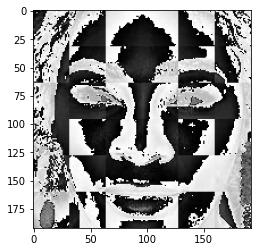

In [18]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [19]:
celebrity_file_names_dict = {}
for img_dir in cropped_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'msd': ['./Dataset/cropped/msd\\msd1.png',
  './Dataset/cropped/msd\\msd10.png',
  './Dataset/cropped/msd\\msd11.png',
  './Dataset/cropped/msd\\msd12.png',
  './Dataset/cropped/msd\\msd13.png',
  './Dataset/cropped/msd\\msd14.png',
  './Dataset/cropped/msd\\msd17.png',
  './Dataset/cropped/msd\\msd19.png',
  './Dataset/cropped/msd\\msd2.png',
  './Dataset/cropped/msd\\msd21.png',
  './Dataset/cropped/msd\\msd22.png',
  './Dataset/cropped/msd\\msd23.png',
  './Dataset/cropped/msd\\msd24.png',
  './Dataset/cropped/msd\\msd25.png',
  './Dataset/cropped/msd\\msd26.png',
  './Dataset/cropped/msd\\msd27.png',
  './Dataset/cropped/msd\\msd28.png',
  './Dataset/cropped/msd\\msd29.png',
  './Dataset/cropped/msd\\msd3.png',
  './Dataset/cropped/msd\\msd30.png',
  './Dataset/cropped/msd\\msd31.png',
  './Dataset/cropped/msd\\msd32.png',
  './Dataset/cropped/msd\\msd33.png',
  './Dataset/cropped/msd\\msd34.png',
  './Dataset/cropped/msd\\msd36.png',
  './Dataset/cropped/msd\\msd37.png',
  './Dat

In [20]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'msd': 0,
 'neeraj chopra': 1,
 'novak djokovic': 2,
 'ronaldo': 3,
 'serena_williams': 4,
 'Virat Kohli': 5}

In [21]:
x = []
y = []
for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scale_img = cv2.resize(img,(32,32))
        img2 = w2d(img,'db1', 5)
        scale_img2 = cv2.resize(img2,(32,32))
        combined_img = np.vstack((scale_img.reshape(32*32*3,1),scale_img2.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [22]:
len(x[0])
len(y)

400

In [23]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(400, 4096)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [28]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.725

In [29]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.69      0.79      0.73        14
           2       0.68      0.72      0.70        18
           3       0.62      0.71      0.67        14
           4       0.69      0.90      0.78        10
           5       0.92      0.92      0.92        13

    accuracy                           0.73        80
   macro avg       0.77      0.72      0.71        80
weighted avg       0.76      0.72      0.71        80



In [30]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [32]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.778125,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.565625,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.765625,{'logisticregression__C': 1}


In [33]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [34]:
best_estimators['svm'].score(x_test,y_test)

0.775

In [35]:
best_estimators['random_forest'].score(x_test,y_test)

0.525

In [36]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8125

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 6,  2,  3,  0,  0,  0],
       [ 2, 11,  0,  0,  1,  0],
       [ 0,  2, 13,  2,  0,  1],
       [ 0,  1,  1, 11,  1,  0],
       [ 0,  1,  0,  0,  9,  0],
       [ 1,  0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

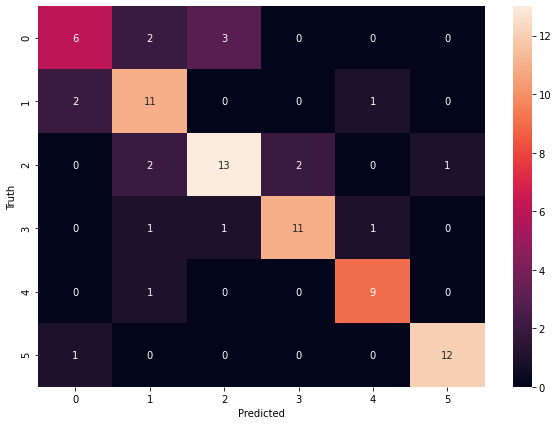

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'msd': 0,
 'neeraj chopra': 1,
 'novak djokovic': 2,
 'ronaldo': 3,
 'serena_williams': 4,
 'Virat Kohli': 5}

In [44]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))